In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as  sns

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
df= df.iloc[:,2:]

In [5]:
df.sample(5)

Age  EstimatedSalary  Purchased
75    34           112000          1
313   49           141000          1
381   48            33000          1
175   23            28000          0
95    35            44000          0

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased', axis =1),
                                                   df['Purchased'],
                                                   test_size = 0.3,
                                                   random_state=0)
x_train.shape, x_test.shape


((280, 2), (120, 2))

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [10]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [11]:
x_train

Age  EstimatedSalary
92    26            15000
223   60           102000
234   38           112000
232   40           107000
377   42            53000
..   ...              ...
323   48            30000
192   29            43000
117   36            52000
47    27            54000
172   26           118000

[280 rows x 2 columns]

In [16]:
x_train_scaled 

Age  EstimatedSalary
0   -1.163172        -1.584970
1    2.170181         0.930987
2    0.013305         1.220177
3    0.209385         1.075582
4    0.405465        -0.486047
..        ...              ...
275  0.993704        -1.151185
276 -0.869053        -0.775237
277 -0.182774        -0.514966
278 -1.065133        -0.457127
279 -1.163172         1.393691

[280 rows x 2 columns]

In [15]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)

In [17]:
np.round(x_train.describe(),1)

Age  EstimatedSalary
count  280.0            280.0
mean    37.9          69807.1
std     10.2          34641.2
min     18.0          15000.0
25%     30.0          43000.0
50%     37.0          70500.0
75%     46.0          88000.0
max     60.0         150000.0

In [18]:
np.round(x_train_scaled.describe(),1)

Age  EstimatedSalary
count  280.0            280.0
mean     0.0              0.0
std      1.0              1.0
min     -1.9             -1.6
25%     -0.8             -0.8
50%     -0.1              0.0
75%      0.8              0.5
max      2.2              2.3

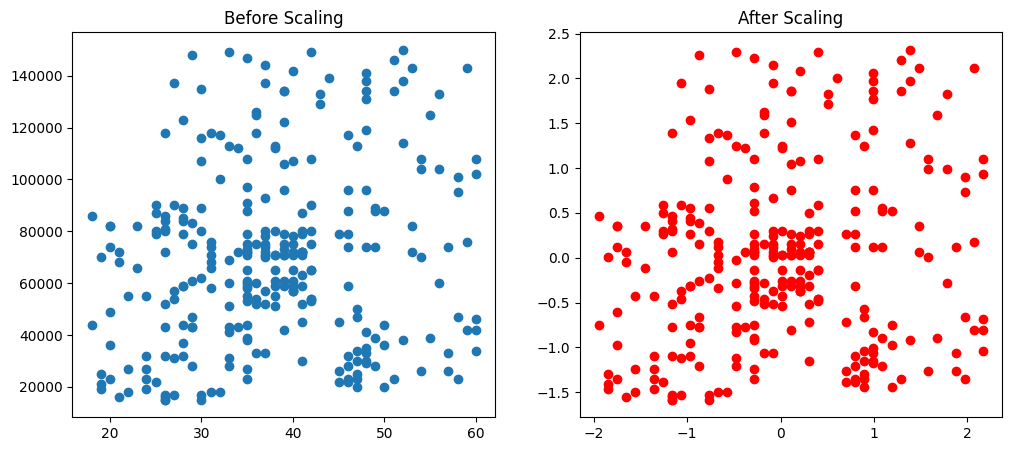

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'], color='red')
ax2.set_title("After Scaling")
plt.show()

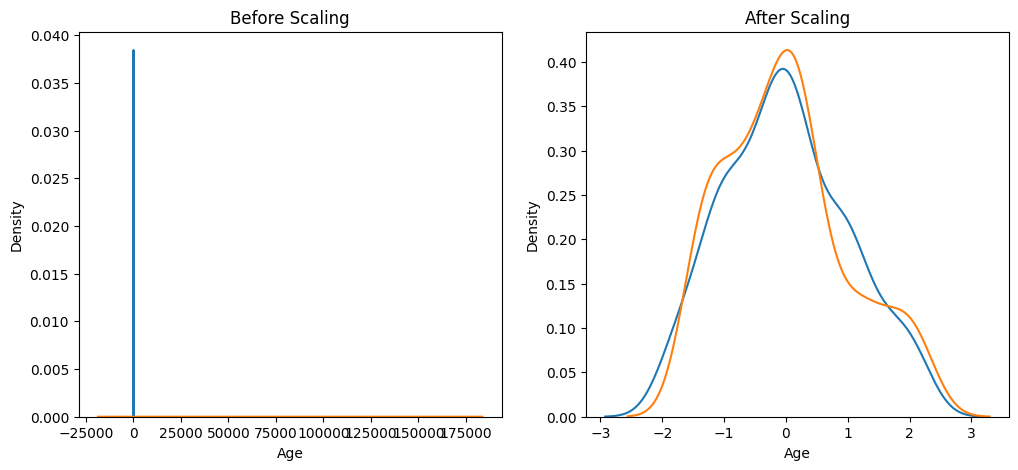

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.set_title("Before Scaling")
sns.kdeplot(x_train['Age'],ax = ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax = ax1)

ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaled['Age'],ax = ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax = ax2)
plt.show()

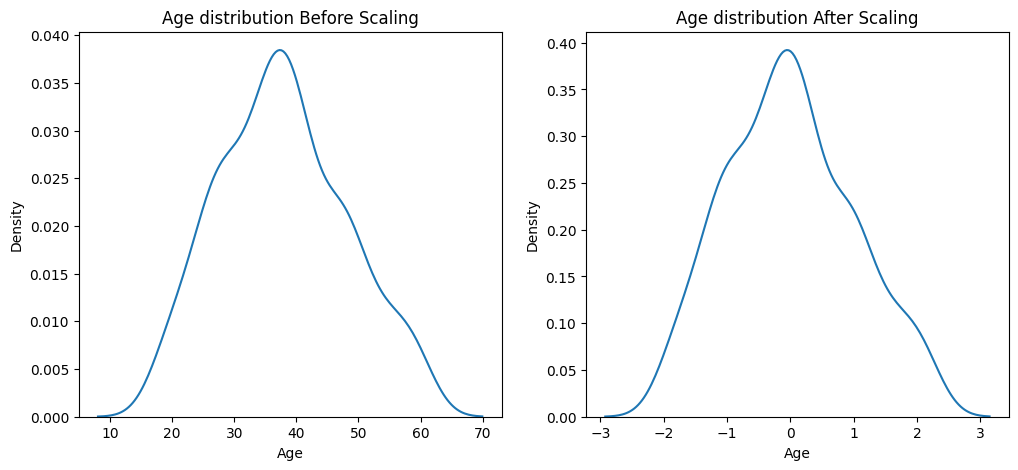

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.set_title("Age distribution Before Scaling")
sns.kdeplot(x_train['Age'],ax = ax1)

ax2.set_title("Age distribution After Scaling")
sns.kdeplot(x_train_scaled['Age'],ax = ax2)
plt.show()

In [27]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [33]:
lr.fit(x_train, y_train)
lr_scaled.fit(x_train_scaled, y_train)

LogisticRegression()

In [34]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
print("Actual", accuracy_score(y_test, y_pred))
print("Scaled", accuracy_score(y_test, y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [40]:
dt.fit(x_train, y_train)
dt_scaled.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [41]:
y_pred = dt.predict(x_test)
y_pred_scaled = dt_scaled.predict(x_test_scaled)

In [42]:
print("Actual", accuracy_score(y_test, y_pred))
print("Scaled", accuracy_score(y_test, y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [43]:
df.describe()

Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000

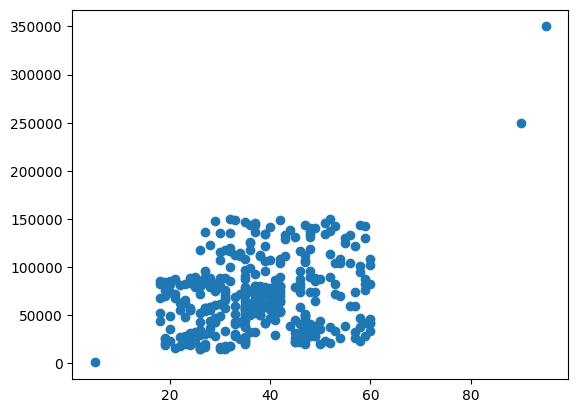

In [54]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [47]:
df = pd.concat(
    [df, pd.DataFrame({
        'Age':[5,90,95],
        'EstimatedSalary':[1000,250000,350000],
        'Purchased':[0,1,1]
    })],
    ignore_index=True
)


In [48]:
df

Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
398   36            33000          0
399   49            36000          1
400    5             1000          0
401   90           250000          1
402   95           350000          1

[403 rows x 3 columns]

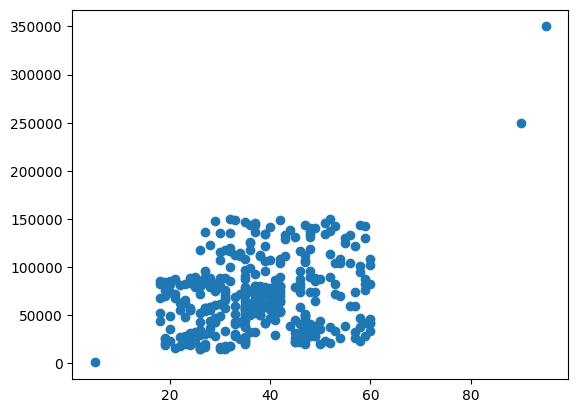

In [49]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased', axis =1),
                                                   df['Purchased'],
                                                   test_size = 0.3,
                                                   random_state=0)
x_train.shape, x_test.shape


((282, 2), (121, 2))

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [52]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)

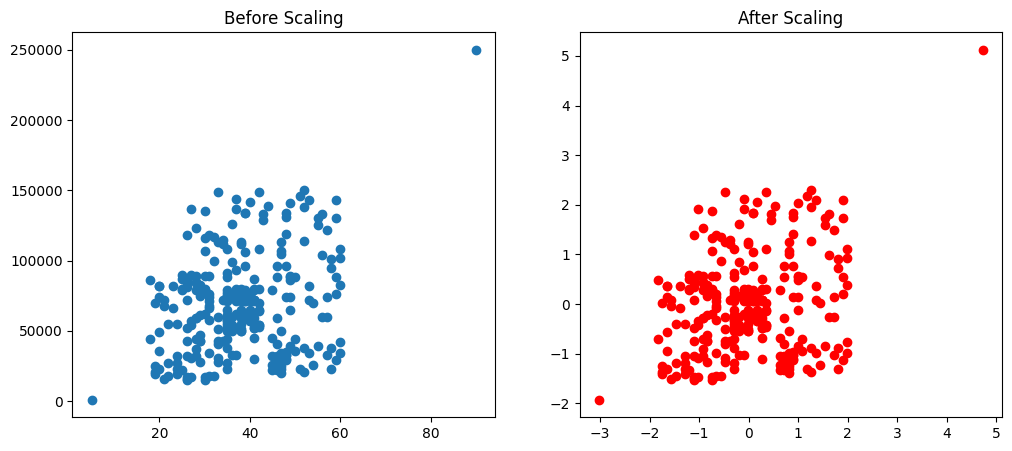

In [53]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'], color='red')
ax2.set_title("After Scaling")
plt.show()